### Only pytorch is working well on my GPU 5070...:(
- but tensorflow's not working tho

In [1]:
import torch

# check if the GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Current device: {device}")

# simple tensor calculation example
x = torch.tensor([1.0, 2.0, 3.0], device=device)
y = torch.tensor([4.0, 5.0, 6.0], device=device)
z = x + y

print(f"Result: {z}")

Current device: cuda
Result: tensor([5., 7., 9.], device='cuda:0')


## 1. Pytorch basics — Tensor and Autograd

In [2]:
import torch

- **Tensor** is the most basic data structure used to perform various mathematical operations in pytorch
- Generalized concept of vectors and matrices in mathematics, and it's an arrangement of numbers in a specific shape
- Tensors have a concept of 'dimension' or 'rank', and if the **rank == 0** it's a **scalar with one number**, a **rank 1 tensor** can be understood as **a vector that lists numbers in a row**, a **rank 2 tensor** can be understood as a **two-dimensional matrix**, and a **rank 3 tensor** can be understood as a **three-dimensional matrix such as a cube**.

In [3]:
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("Rank(dim):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
Rank(dim): 2


- **unsqueeze(), squeeze(), view()** : Artificially change the rank and shape of a tensor

In [4]:
# unsqueeze() : increase rank(dim)
x = torch.unsqueeze(x, 0) # rank 2 tensor with [3, 3] shape -> add dim value '1' in the index 0 -> rank 3 tensor with [1, 3, 3] shape
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("rank(dim):", x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size: torch.Size([1, 3, 3])
Shape: torch.Size([1, 3, 3])
rank(dim): 3


In [5]:
# squeeze() : decrease rank(dim)
x = torch.squeeze(x) 
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("rank(dim):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
rank(dim): 2


In [6]:
# view() : change shape (but can't change the number of elements)
x = x.view(9)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("rank(dim):", x.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Size: torch.Size([9])
Shape: torch.Size([9])
rank(dim): 1


In [7]:
# A tensor with 9 elements cannot be changed to a 2x4, i.e. 8 element tensor
try:
    x = x.view(2, 4)
except Exception as e:
    print(e) # print error

shape '[2, 4]' is invalid for input of size 9


### Operations using tensors and matrix multiplication

In [8]:
# matrix w : use randn() function, which extracts values randomly from the Normal distribution
# matrix x : assign the float type elements directly

w = torch.randn(5, 3, dtype=torch.float)
x = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

print("w size:", w.size())
print("x size:", x.size())
print("w:", w)
print("x:", x)

w size: torch.Size([5, 3])
x size: torch.Size([3, 2])
w: tensor([[ 1.0374,  0.1331, -0.1185],
        [-0.5818,  0.4029,  0.0690],
        [-0.7859,  0.5535, -0.4817],
        [-0.1101, -1.0012,  0.2743],
        [-1.4543,  0.1217,  1.6954]])
x: tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [9]:
# Add a tensor named b to use in other matrix operations
b = torch.randn(5, 2, dtype=torch.float)
print("b:", b.size())
print("b:", b)

b: torch.Size([5, 2])
b: tensor([[ 0.1503,  0.9180],
        [-1.5596,  1.0528],
        [ 2.6218,  0.0428],
        [ 0.7303, -0.6349],
        [-0.8130,  1.6860]])


- **torch.mm(m, n)** : matrix multiplication (m*n)

In [10]:
# torch.mm() : Perform matrix multiplication
wx = torch.mm(w, x) # The rows of w are 5, the columns of x are 2, so the shape is [5, 2]
print("wx size:", wx.size())
print("wx:", wx)

wx size: torch.Size([5, 2])
wx: tensor([[ 0.8442,  1.8962],
        [ 0.9722,  0.8623],
        [-1.5338, -2.2479],
        [-1.7420, -2.5789],
        [ 7.3880,  7.7508]])


In [11]:
# Add elements of matrix b to elements of matrix wx
result = wx + b
print("result size:", result.size())
print("result:", result)

result size: torch.Size([5, 2])
result: tensor([[ 0.9945,  2.8142],
        [-0.5874,  1.9152],
        [ 1.0880, -2.2051],
        [-1.0116, -3.2138],
        [ 6.5750,  9.4368]])


### Autograd
- **Automatically calculates the gradient** of a formula
- PyTorch's Autograd automates the calculation of differentiation, saving you the trouble of implementing gradient descent.

In [12]:
# define scalar tensor w(1.0), and calculate the gradient by differentiating with w 
# requires_grad=True : w에 대한 미분값을 w.grad에 저장해줌 
w = torch.tensor(1.0, requires_grad=True)

a = w*3

l = a**2

# .backward() : Chain rule application
l.backward()
print(w.grad)
print('l을 w로 미분한 값은 {}'.format(w.grad))

tensor(18.)
l을 w로 미분한 값은 18.0


## 2. Implementing ANN

In [13]:
import torch
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

### Preparing dataset
- make_blobs() -> create the data in the form of a 2D vector
- train_test_split = 0.2

In [14]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1], [-1,-1], [1,-1], [-1,1]], shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1], [-1,-1], [1,-1], [-1,1]], shuffle=True, cluster_std=0.3)

- The neural network we'll train this time is a very basic model that predicts only **two labels**, so let's merge the four labels into two
- label_map() function : 
- all data with labels 0 or 1 will be changed to **label 0**, and all data with labels 2 or 3 will be changed to **label 1**

In [15]:
def label_map(y_ ,from_, to_):
    y = np.copy(y_)
    for f in from_:
        y[y_==f]=to_
    return y

In [16]:
y_train = label_map(y_train, [0,1], 0)
y_train = label_map(y_train, [2,3], 1)
y_test = label_map(y_test, [0,1], 0)
y_test = label_map(y_test, [2,3], 1)

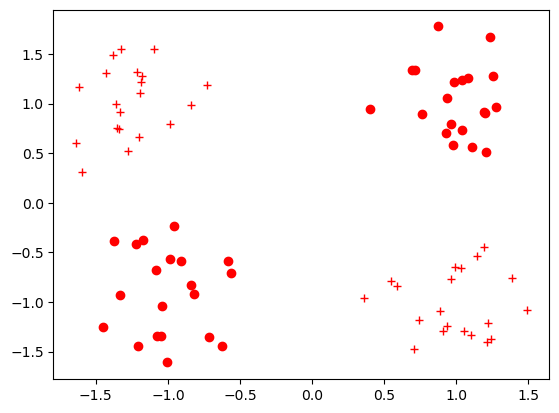

In [17]:
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+') # label 0 is dot, label 1 is '+'

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [18]:
# change the numpy vector into pytorch tensor
x_train = torch.FloatTensor(x_train)
print(x_train.shape)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

torch.Size([80, 2])


### Neural Network Implementation

In [19]:
class NeuralNet(torch.nn.Module): # pytorch NN은 보통 torch.nn.Module을 상속받는 파이썬 클래스로 정의
    def __init__(self, input_size, hidden_size):
        # super() 함수를 부르면 이 NeuralNet 클래스는 pytorch의 nn.Module 클래스의 속성들을 갖고 초기화됨
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, input_tensor): 
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

In [20]:
model = NeuralNet(2, 5) 
learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [21]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test) # 모델의 결과값과 label 값의 차원을 맞추기 위해 squeeze() 사용
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.6629090905189514


In [22]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad() # epoch마다 새로운 경삿값 계산하기 위해 zero_grad() 호출하여 경사값 0으로 설정
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 == 0: # 100 epoch마다 오차를 출력하여 학습이 잘 되는지 확인
        print('Train loss as {} is {}'.format(epoch, train_loss.item()))
    train_loss.backward()
    optimizer.step()

Train loss as 0 is 0.6472691297531128
Train loss as 100 is 0.5762441158294678
Train loss as 200 is 0.49268025159835815
Train loss as 300 is 0.4065829813480377
Train loss as 400 is 0.33309486508369446
Train loss as 500 is 0.274986207485199
Train loss as 600 is 0.23015382885932922
Train loss as 700 is 0.19575943052768707
Train loss as 800 is 0.16934694349765778
Train loss as 900 is 0.14850452542304993
Train loss as 1000 is 0.13187521696090698
Train loss as 1100 is 0.11847442388534546
Train loss as 1200 is 0.10744639486074448
Train loss as 1300 is 0.09817083925008774
Train loss as 1400 is 0.0902346521615982
Train loss as 1500 is 0.08338416367769241
Train loss as 1600 is 0.07741287350654602
Train loss as 1700 is 0.07216668128967285
Train loss as 1800 is 0.06753601133823395
Train loss as 1900 is 0.06342875957489014


In [23]:
model.eval()
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.11760316044092178


- **state_dict()**: 모델 내 가중치들이 딕셔너리 형태로 {연산 이름: 가중치 텐서와 편향 텐서}와 같이 표현된 데이터

In [24]:
# 학습된 모델을 .pt형태로 저장
torch.save(model.state_dict(), './model.pt') # 학습된 신경망의 가중치를 내포하는 model.pt라는 파일이 생성됨
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[-0.9580,  0.9451],
        [-0.4658,  0.4635],
        [-0.4751,  0.0319],
        [-1.3778,  1.3467],
        [ 1.8472, -1.7429]])), ('linear_1.bias', tensor([-0.5141, -0.2324, -0.5707, -0.7834, -0.6514])), ('linear_2.weight', tensor([[1.2642, 0.5385, 0.0567, 2.0102, 2.5904]])), ('linear_2.bias', tensor([-2.9662]))])


In [25]:
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('벡터 [-1,1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1,1]이 레이블 1을 가질 확률은 0.9555134177207947


## 3. DNN — Deep Neural Network

### Fashion MNIST dataset

In [26]:
from torchvision import datasets, transforms, utils
# torchvision.datasets : load image dataset
# torchvision.transforms : 이미지 데이터셋에 쓸 수 있는 여러가지 변환 필터를 담은 모듈
# torchvision.utils : 이미지 데이터를 저장하고 시각화하기 위한 도구가 들어있는 모듈
from torch.utils import data
# torch.utils.data : 데이터셋의 표준을 정의하고 데이터셋을 불러오고 자르는 등에 쓰는 도구들이 들어있는 모듈

import matplotlib.pyplot as plt
import numpy as np

- .ToTensor() : 이미지를 파이토치 텐서로 변경

In [27]:
# image into tensor 
transform = transforms.Compose([transforms.ToTensor()]) 

In [28]:
# download fashion mnist dataset
trainset = datasets.FashionMNIST(
    root = './.data/',
    train = True,
    download = True,
    transform = transform
)

testset = datasets.FashionMNIST(
    root = './.data/',
    train = False,
    download = True,
    transform = transform
)

 - torchvision.datasets로 생성된 객체는 pytorch 내부 클래스 torch.utils.data.Dataset을 상속함
 - 그러므로 pytorch에서 데이터셋을 로딩하는 클래스인 DataLoader에 넣어 바로 사용 가능!
 - 'DataLoader' : 데이터셋을 batch라는 작은 단위로 쪼개고 학습 시 반복문 안에서 데이터를 공급해주는 클래스
 - 배치 크기는 한 번에 처리하는 데이터 개수를 뜻하므로 컴퓨터 메모리 공간에 여유가 있다면 더 크게 해도 되고, 여유가 없다면 적게 해도 좋음

In [29]:
batch_size = 16
train_loader = data.DataLoader(
    dataset = trainset,
    batch_size = batch_size
)
test_loader = data.DataLoader(
    dataset = testset,
    batch_size = batch_size
)

In [30]:
dataiter = iter(train_loader) # 배치 1개만 뽑아서 데이터 형태 확인
print(dataiter)
images, labels = next(dataiter) # next() 로 배치 1개를 가져옴
# images와 labels에는 앞서 설정한 배치 크기만큼 각각 16개의 이미지와 레이블이 들어있음

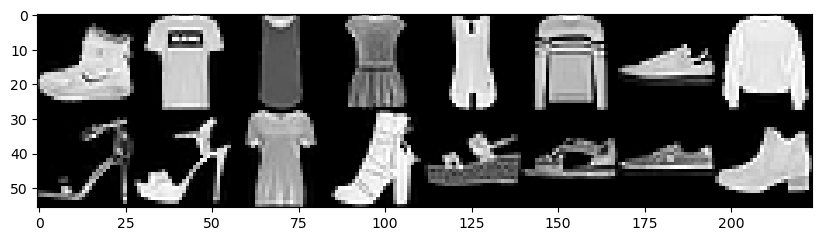

In [31]:
img = utils.make_grid(images, padding=0) # util.make_grid() 함수를 이용해 여러 이미지를 모아 하나의 이미지 생성
npimg = img.numpy() # img는 pytorch tensor이므로 numpy 행렬로 변환
plt.figure(figsize=(10, 7))
plt.imshow(np.transpose(npimg, (1,2,0))) # np.transpose() 함수를 통해 0번째 차원을 맨 뒤로 보냄
plt.show()

In [32]:
print(labels) # 각 class를 뜻하는 16개의 숫자 나열

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9])


In [33]:
CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

for label in labels:
    idx = label.item()
    print(CLASSES[idx])

Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover
Sneaker
Pullover
Sandal
Sandal
T-shirt/top
Ankle boot
Sandal
Sandal
Sneaker
Ankle boot


- 이미지 데이터는 가로, 세로, 색상으로 구성된 3차원 행렬로 표현됨
- 가로/세로는 각각의 pixel 수, 그리고 색상값은 흑백 사진이므로 1가지 숫자로 나타냄
- 각 pixel은 0-255까지의 값 / 이미지의 크기는 28*28 / 색상 채널은 흑백 1가지 => 특징값의 총 개수는 28*28*1 개로 총 784개

(28, 28)


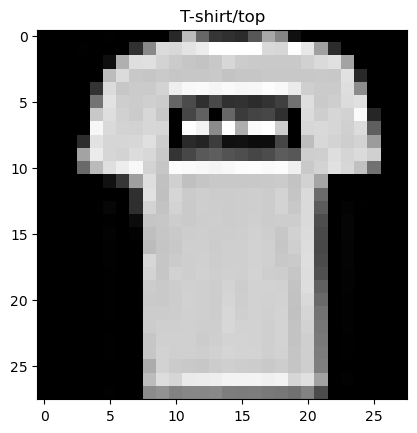

In [34]:
idx = 1

item_img = images[idx]
item_npimg = item_img.squeeze().numpy() # matplotlib에서 사용가능하도록 numpy행렬로 생성
plt.title(CLASSES[labels[idx].item()]) # label을 앞서만든 딕셔너리로 숫자를 이름으로 변경
print(item_npimg.shape)
plt.imshow(item_npimg, cmap='gray')
plt.show()

### Neural Net으로 패션 아이템 분류하기

In [35]:
import torch
import torch.nn as nn # 인공신경망 모델의 재료를 담고 있는 모듈
import torch.optim as optim # 최적화 모듈
import torch.nn.functional as F
from torchvision import transforms, datasets # torch 버전의 dataset을 다루기 위한 모듈

In [36]:
USE_CUDA = torch.cuda.is_available() # CUDA를 사용할 수 있는지 알아보는 함수
DEVICE = torch.device("cuda" if USE_CUDA else "cpu") # cpu와 gpu 중 사용 가능한 것을 사용

In [37]:
EPOCHS = 30 # 학습 데이터 전체를 총 몇 번이나 볼 것인지
BATCH_SIZE = 64 # 데이터가 많아지므로 여러 개의 batch로 잘라서 사용

- 이미지 분류는 한 장의 이미지를 받아 이미지가 어느 class(label)에 속하는지 알려주는 문제
- NN 모델은 입력 x와 label y를 받아 학습한 다음, 새로운 x가 왔을 때 어떤 패션 아이템인지 예측
- 우리가 사용할 모델은 layer가 3개인 3층 ANN

In [38]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__() # 생성자에 모델의 가중치 변수들이 들어가는 연산을 정의 
        self.fc1 = nn.Linear(784, 256) # nn.Linear: 선형 결합을 수행하는 객체를 생성
        # fc1() : pixel 값 784개를 입력받아 가중치를 행렬곱하고 bias를 더해 256개 값을 출력
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10) # 최종적으로 10개의 output

    def forward(self, x):
        x = x.view(-1, 784) # 입력을 받아 view() 함수로 1차원 행렬로 생성
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

- to() : 모델의 파라미터들을 지정한 곳으로 보내는 역할
  ex) GPU를 사용하고자 하는 경우 to("cuda")로 지정하여 GPU로 보내야하며, 지정하지 않을 시 계속 CPU에 남게되는 참사..
- 준비해둔 DEVICE 변수를 사용해서 자동으로 CUDA를 사용할 경우 GPU, 아닐 경우 CPU로 보내짐
- 최적화 알고리즘은 pytorch 내장 optim.SGD 사용

In [39]:
# model definition
model = Net().to(DEVICE)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [40]:
# training
def train(model, train_loader, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # 학습 데이터를 DEVICE의 메모리로 보냄
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad() # 반복 때마다 기울기를 새로 계산
        output = model(data)
        loss = F.cross_entropy(output, target) # class가 10개 존재하므로 cross entropy 사용
        loss.backward() # 기울기 계산 
        optimizer.step() # 계산한 기울기를 앞서 정의한 알고리즘에 맞추어 가중치 수정

In [41]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0 # test error
    correct = 0 # 예측이 맞은 수 
    with torch.no_grad(): # 평가과정에서는 기울기 계산 필요 X
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)

            # 모든 오차 더하기
            test_loss += F.cross_entropy(output, target, reduction='sum').item()

            # 가장 큰 값을 가진 클래스가 모델의 예측 : 예측과 정답을 비교하여 일치할 경우 correct에 1을 더함
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()
            
    test_loss /= len(test_loader.dataset)
    # 전체 데이터셋에 대한 오차와 맞힌 개수의 합이 구해졌으므로 이것을 test set의 데이터 수로 나눠 평균 구하기
    test_accuracy = 100. * correct / len(test_loader.dataset) # 총 정답 평균에는 100을 곱하여 정확도 계산
    return test_loss, test_accuracy

In [42]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)

    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(epoch, test_loss, test_accuracy))

[1] Test Loss: 0.5581, Accuracy: 80.50%
[2] Test Loss: 0.4898, Accuracy: 82.57%
[3] Test Loss: 0.4511, Accuracy: 83.94%


KeyboardInterrupt: 

### Overfitting and Regularization
- 과적합을 방지하는 방법은 데이터를 최대한 늘리는 것!
- 이미지 데이터라면 data augmentation도 가능하므로 오른쪽과 왼쪽을 뒤집은 가로 대칭이동을 해보자.

In [ ]:
train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./.data',
                   train=True,
                   download=True,
                   transform=transforms.Compose([ # 토치비전의 transforms 패키지를 사용
                       transforms.RandomHorizontalFlip(), # RandomHorizontalFlip(): 이미지를 무작위로 수평 뒤집기
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=BATCH_SIZE, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./.data',
                   train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=BATCH_SIZE, shuffle=True)

- Dropout : 모델에 직접 영향을 주어 과적합을 해결하는 방법
- 학습 진행과정에서 신경망의 일부를 사용하지 않는 방법
- 학습에서 배재된 뉴런 외에 다른 뉴런들에 가중치를 분산시키고 개별 뉴런이 특징에 고정되는 현상을 방지하는 기능

In [ ]:
# Dropout 구현 : forward 함수에 F.dropout() 추가
class Net(nn.Module):
    def __init__(self, dropout_p=0.2): # 0.2 : 학습 시 20%의 뉴런을 사용하지 않겠다는 의미
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        # 드롭아웃 확률
        self.dropout_p = dropout_p

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training, p=self.dropout_p)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, training=self.training, p=self.dropout_p)
        x = self.fc3(x)
        return x

In [ ]:
model        = Net(dropout_p=0.2).to(DEVICE) 
optimizer    = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1, EPOCHS + 1): # same training code
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))

## 4. Autoencoder in Pytorch (w/ Linear layer)

In [43]:
import torch
import torchvision
import torch.nn.functional as F
from torch import nn, optim
from torchvision import transforms, datasets

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

In [44]:
# Hyperparameters
EPOCH = 10
BATCH_SIZE = 64
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print("Using Device:", DEVICE)

Using Device: cuda


In [45]:
# fashion MNIST 데이터셋 불러오기 (학습데이터만 사용)
trainset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = transforms.ToTensor()
)

train_loader = torch.utils.data.DataLoader(
    dataset     = trainset,
    batch_size  = BATCH_SIZE,
    shuffle     = True,
    num_workers = 2
)

In [46]:
# Autoencoder (sequential API ver.)
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential( # nn.Sequential을 사용해 encoder와 decoder 두 모듈로 묶기
            nn.Linear(28*28, 128), #차원을 28*28에서 점차 줄여나감
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3),   # 입력의 특징을 3차원으로 압축
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12), #디코더는 차원을 점차 28*28로 복원
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),       # 픽셀당 0과 1 사이로 값을 출력하는 sigmoid()함수
        )

    def forward(self, x):
        encoded = self.encoder(x) 
        decoded = self.decoder(encoded) 
        return encoded, decoded

In [47]:
# Autoencoder (functional API ver.)
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # 가중치만 정의하고 activation은 forward에서 직접 호출
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 12)
        self.fc4 = nn.Linear(12, 3)

        self.fc5 = nn.Linear(3, 12)
        self.fc6 = nn.Linear(12, 64)
        self.fc7 = nn.Linear(64, 128)
        self.fc8 = nn.Linear(128, 28*28)

    def forward(self, x):
        # encoder
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        z = encoded = self.fc4(x)  

        # decoder
        x = F.relu(self.fc5(z))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        decoded = torch.sigmoid(self.fc8(x))  # reconstruction

        return encoded, decoded    

In [48]:
model = Autoencoder().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
criterion = nn.MSELoss() # x'-x 를 MSE로 계산

In [49]:
# visualize original image 
view_data = trainset.data[:5].view(-1, 28*28) # 5개 이미지로 복원이 어떻게 되는지 관찰 테스트 
view_data = view_data.type(torch.FloatTensor)/255. # pixel 색상값이 0-255 이므로

In [50]:
def train(model, train_loader):
    model.train()
    for step, (x, label) in enumerate(train_loader):
        x = x.view(-1, 28*28).to(DEVICE)
        y = x.view(-1, 28*28).to(DEVICE) # x and y are all original image(x)
        label = label.to(DEVICE)

        encoded, decoded = model(x)
        loss = criterion(decoded, y) # model 출력값인 decoded와 원본 이미지(y) 사이의 MSELoss
        optimizer.zero_grad() # 기울기 정보 초기화
        loss.backward() # 기울기 구하기
        optimizer.step() # 최적화

[Epoch 1]


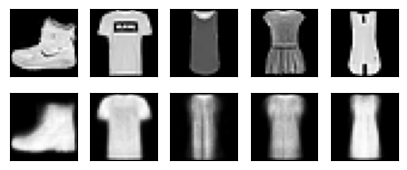

[Epoch 2]


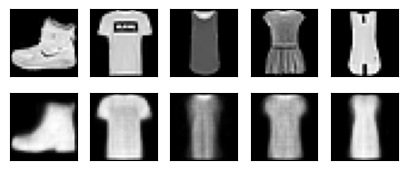

[Epoch 3]


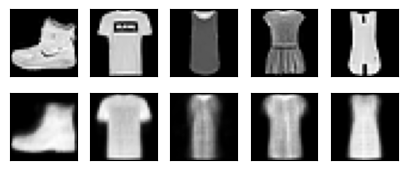

[Epoch 4]


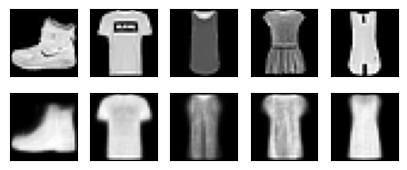

[Epoch 5]


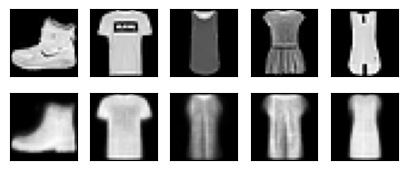

[Epoch 6]


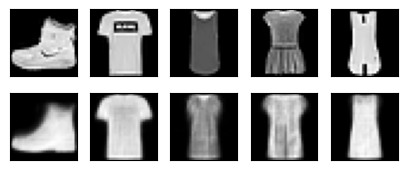

[Epoch 7]


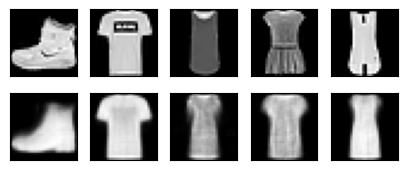

[Epoch 8]


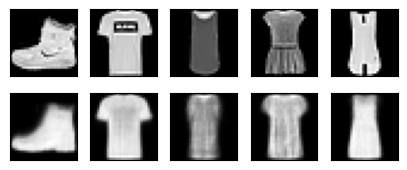

[Epoch 9]


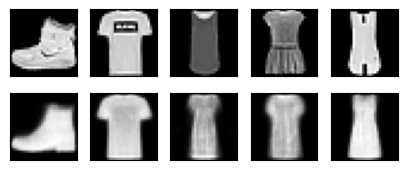

[Epoch 10]


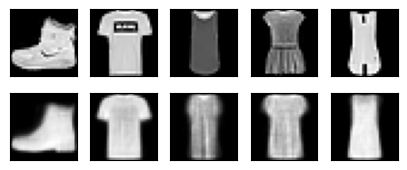

In [53]:
for epoch in range(1, EPOCH+1):
    train(model, train_loader)

    # visualize the decoder output(x')
    test_x = view_data.to(DEVICE)
    _, decoded_data = model(test_x)

    # compare x vs x'(decoded)
    f, a = plt.subplots(2, 5, figsize=(5, 2))
    print("[Epoch {}]".format(epoch))
    for i in range(5):
        img = np.reshape(view_data.data.numpy()[i],(28,28)) # pytorch tensor를 numpy로 변환
        a[0][i].imshow(img, cmap='gray')
        a[0][i].set_xticks(()); a[0][i].set_yticks(())

    for i in range(5):
        img = np.reshape(decoded_data.to("cpu").data.numpy()[i], (28, 28))
        # CUDA를 사용할 시 모델 출력값이 GPU에 남아있으므로 .to("cpu")로 일반 메모리로 가져온 뒤 numpy 행렬로 변환
        a[1][i].imshow(img, cmap='gray')
        a[1][i].set_xticks(());a[1][i].set_yticks(())
    plt.show()

## 5. Autoencoder in Pytorch (w/ Conv2D layer)

1. Prepare dataset
   - MNIST 데이터셋 로드 및 정규화 (transforms.ToTensor())
   - DataLoader로 배치 단위로 나누어 학습 준비
2. Autoencoder model 구성
   - encoder : Conv2D와 linear layer로 입력 이미지를 10차원 잠재 공간으로 압축
   - decoder : ConvTranspose2D와 linear layer로 잠재 공간을 원본 이미지로 복원
3. Traning setting
   - loss function : input과 reconstructed image의 MSE
   - optimizer : Adam (lr=0.0001)
4. Training workflow
   - 입력 > encoder > latent space > decoder > reconstructed image
   - loss 계산 : 역전파로 가중치 update
   - epoch마다 평균 손실 출력 및 결과 시각화
5. Results
   - Check the model performance by comparing input & reconstructed image

In [8]:
import torch                       # pytorch 텐서 연산 및 신경망 구현
import torchvision                 # computer vision 관련 도구 및 데이터셋 제공해주는 라이브러리
from torchvision import transforms # 데이터 전처리(변환) 도구
import torch.nn.functional as F    # NN의 함수 기반 연산 제공
import torch.nn as nn              # define NN layer
import torch.optim as optim        # optimizing algorithm
import cv2                         # OpenCV : 이미지 처리 및 변환
import numpy as np
import matplotlib.pyplot as plt

- **torchvision.transforms**
  - transforms.ToTensor() : 이미지를 0-255 범위의 픽셀 값을 갖는 array > 0-1 범위로 정규화된 PyTorch tensor로 변환
  - transforms.Normalize() : 이미지를 평균과 표준편차로 정규화
```
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5]) # normalization
])
```

- **torch.nn** : 신경망의 계층을 정의하는 데 사용
  - nn.Module: PyTorch 모델의 기본 클래스로, 모든 신경망 모델은 이를 상속받아 정의
  - nn.Conv2d : 2D convolution 연산을 수행하는 layer
  - nn.ReLU : 활성화 함수 ReLU
  - nn.Linear : fully connected layer
  - ex) ```fc = nn.Linear(128, 10) # 입력 128차원, 출력 10차원```
- **torch.nn.functional** : 함수 기반으로 다양한 연산 수행
  - 모델 정의 시 nn 모듈보다 함수 형태로 사용할 때 더 간결하게 작성 가능!
  ```
    import torch.nn.functional as F
    F.relu(x)
  ```
- **torch.optim** : 다양한 최적화 알고리즘 (SGD, Adam 등)을 제공
  ex) ```optimizer = optim.Adam(model.parameters(), lr=1e-4) # Adam 최적화```

- PyTorch는 Numpy 배열과 PyTorch 텐서 간의 변환을 지원해줌
```
arr = np.array([1, 2, 3])
tensor = torch.from_numpy(arr) # numpy 배열 -> pytorch tensor
array = tensor.numpy()         # pytorch tensor -> numpy 배열
```
- cv2 : OpenCV는 이미지 처리에 유용한 라이브러리로서, 이미지를 읽고 처리하며 시각화하는 데 사용
```
import cv2
img = cv2.imread("image.jpg") # 이미지 열기
img_resized = cv2.resize(img, (128, 128)) # 크기 조절

```

0. 디바이스 설정
   - gpu가 사용 가능한 지 확인한 후, 가능하면 GPU 디바이스를 설정하고 아니라면 CPU를 디바이스로 설정

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"{device} is avaiable")

cuda:0 is avaiable


### 1) MNIST 데이터셋 로드
   1. MNIST 데이터셋을 지정된 경로에 download
   2. 데이터를 tensor로 변환하여 [0, 1] 범위로 정규화
   3. 데이터셋을 DataLoader를 통해 배치 단위로 관리하고 학습에서 랜덤하게 섞어 사용

In [3]:
# Download dataset
dataset = torchvision.datasets.MNIST(
    "./data/",        # 데이터를 저장할 경로 지정
    download=True,    # MNIST 데이터셋이 경로에 없으면 다운로드
    train=True,       # 학습용 (train) 데이터셋만 사용
    transform=transforms.ToTensor()  # 이미지를 tensor 형태로 변환하고 [0, 1] 범위로 정규화
)

# Generate DataLoader in order to manage data efficiently
trainloader = torch.utils.data.DataLoader(
    dataset,        # 데이터셋 로드
    batch_size=50,  # 한 번에 50개의 데이터를 배치로 묶어 학습에 전달
    shuffle=True    # 데이터를 매번 랜덤하게 섞어 학습 시 과적합 방지
)

- Flatten 클래스 : 4D tensor(image data) > 2D tensor 로 변환
  - Conv2D layer와 FC Layer(linear) 연결 시 서로 간의 데이터 형태를 맞출 때 자주 사용
  - FC layer는 입력 데이터를 vector(2D tensor)로 받는 반면, Conv2D layer는 입력 데이터를 여러 필터로 변환하여 feature map을 생성
  - 따라서 view() 함수를 이용해 Conv2D에서 나온 4D tensor를 vector 형태로 변환
  - ex) (50, 16, 7, 7) > (50, 16 * 7 * 7) > (50, 784)
  - Conv layer는 이미지의 **지역적 특징**을 추출하고, FC layer는 이러한 특징을 결합해 **최종 예측값(분류, 회귀 등)** 을 생성

In [4]:
class Flatten(nn.Module):
    def forward(self, x):
        # x는 4차원 tensor로 입력됨 : (B, C, H, W)
        batch_size = x.shape[0] # batch size(B)
        # view() 함수를 사용하여 2D tensor로 변환
        # 두 번째 차원은 H, W, C를 모두 곱해 vector(2D tensor) 형태로 생성
        return x.view(batch_size, -1) # (B, C * H * W)

- Unflatten 클래스 : 2D tensor > 4D tensor(image data) 로 복원
  - decoder에서 FC layer의 출력을 다시 이미지 형태로 변환할 때 사용

In [5]:
class Unflatten(nn.Module):
    def __init__(self, k): # k(int) : 복원할 4D tensor의 채널 개수
        super(Unflatten, self).__init__()
        self.k = k # 출력 텐서의 채널 개수 설정

    def forward(self, x): # x(torch.Tensor) : 2D(B, vector size) 형태의 input tensor
        s = x.size() # input tensor의 크기 : (B, vector size)
        feature_size = int((s[1] // self.k) ** 0.5) # calculate H W
        # vector size = C * (H * W)
        # H, W = (vector size / C) ** (1/2) 로 구함
        return x.view(s[0], self.k, feature_size, feature_size) # 4D tensor (B, C, H, W) 

### 2) Autoencoder class

In [6]:
# new
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.k = 16  # 첫 번째 레이어의 채널 수
        
        # Encoder layers
        self.conv1 = nn.Conv2d(1, self.k, kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(self.k, 2*self.k, kernel_size=3, stride=2)
        self.conv3 = nn.Conv2d(2*self.k, 4*self.k, kernel_size=3, stride=1)
        self.fc1 = nn.Linear(1024, 10)  # 4*k*4*4=1024 (k=16)
        
        # Decoder layers
        self.fc2 = nn.Linear(10, 1024)
        self.deconv1 = nn.ConvTranspose2d(4*self.k, 2*self.k, kernel_size=3, stride=1)
        self.deconv2 = nn.ConvTranspose2d(2*self.k, self.k, kernel_size=3, stride=2)
        self.deconv3 = nn.ConvTranspose2d(self.k, 1, kernel_size=3, stride=2, output_padding=1)

    def forward(self, x):
        # Encoder path
        x = F.relu(self.conv1(x))  # [B, 16, 13, 13]
        x = F.relu(self.conv2(x))  # [B, 32, 6, 6]
        x = F.relu(self.conv3(x))  # [B, 64, 4, 4]
        
        # Flatten and linear
        x = x.view(x.size(0), -1)  # [B, 1024]
        encoded = F.relu(self.fc1(x))  # [B, 10]
        
        # Decoder path
        x = F.relu(self.fc2(encoded))  # [B, 1024]
        x = x.view(x.size(0), 4*self.k, 4, 4)  # [B, 64, 4, 4]
        x = F.relu(self.deconv1(x))  # [B, 32, 6, 6]
        x = F.relu(self.deconv2(x))  # [B, 16, 13, 13]
        decoded = self.deconv3(x)  # [B, 1, 28, 28]
        
        return decoded


### 3) Training setting

In [11]:
model = Autoencoder().to(device)
# loss function
criterion = nn.MSELoss() # anomaly detection에서는 이 loss를 크게 하는 놈을 찾는 게 목표
# optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [13]:
def check_plot():
    with torch.no_grad():  # no_grad() : test 중이니까 weight update 금지
        for data in trainloader:
            inputs = data[0].to(device) # x
            outputs = model(inputs)     # x'

            # 입력 데이터와 복원된 데이터의 차원을 조정하여 NumPy 형식으로 변환
            # permute(0, 2, 3, 1): PyTorch (N, C, H, W) > NumPy (N, H, W, C)
            # .cpu().numpy(): 데이터를 CPU로 옮기고 NumPy 배열로 변환
            input_samples = inputs.permute(0, 2, 3, 1).cpu().numpy()
            reconstructed_samples = outputs.permute(0, 2, 3, 1).cpu().numpy()
            break  # 배치 하나만 처리하기 위해 반복문 종료

    columns, rows = 10, 5  # 10열, 5행의 격자로 이미지를 시각화

    # visualize x
    fig = plt.figure(figsize=(8, 4))  
    for i in range(1, columns * rows + 1):  # 배치에서 최대 50개의 이미지를 순회
        img = input_samples[i - 1]  # x
        fig.add_subplot(rows, columns, i)  
        plt.imshow(img.squeeze(), cmap="gray")  # 이미지를 시각화하고 채널 제거
        plt.axis("off") 
    plt.show()  

    # visualize x'
    fig = plt.figure(figsize=(8, 4))  
    for i in range(1, columns * rows + 1):  
        img = reconstructed_samples[i - 1]  # x'
        fig.add_subplot(rows, columns, i) 
        plt.imshow(img.squeeze(), cmap="gray")  
        plt.axis("off")  
    plt.show()  

### 4) Training workflow

[1] loss: 0.036


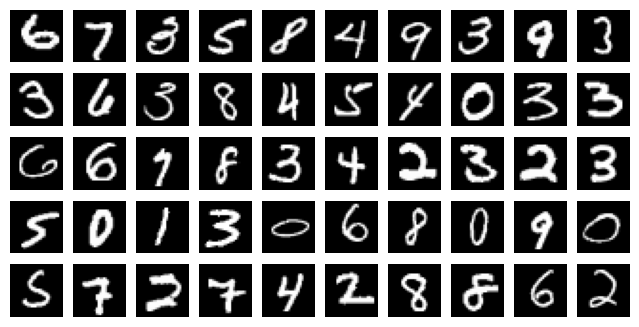

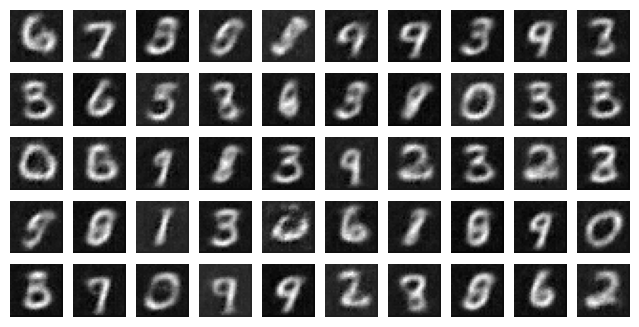

[11] loss: 0.027


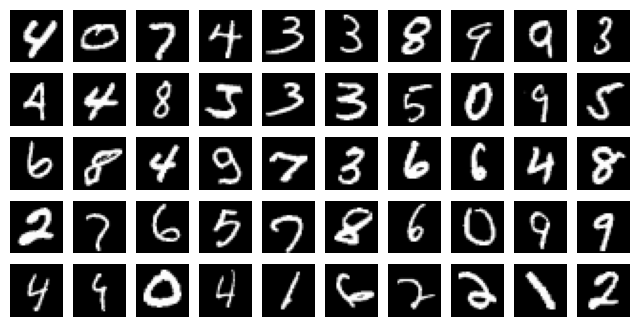

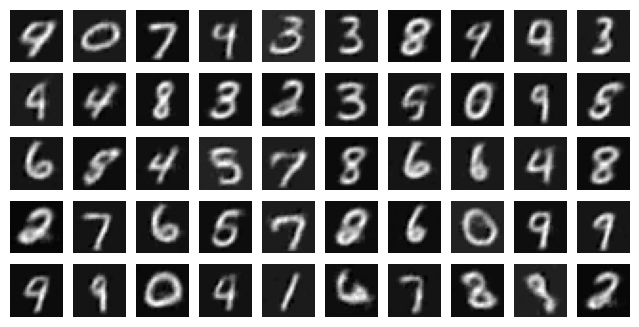

[21] loss: 0.025


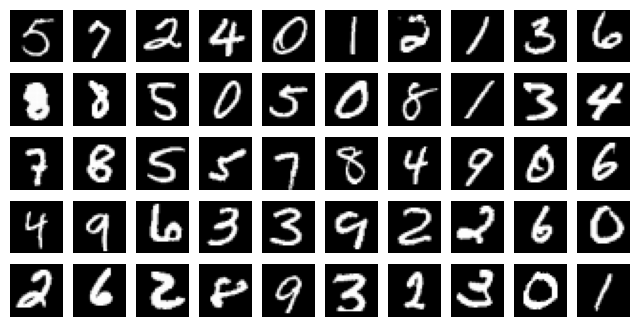

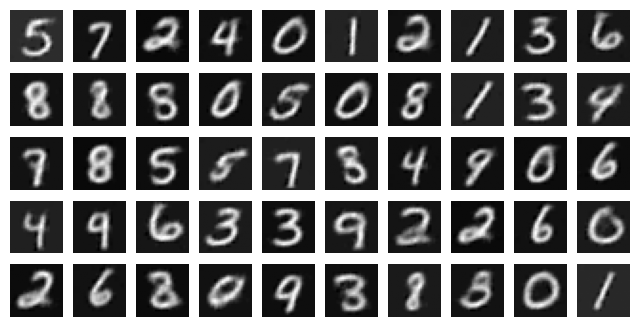

In [14]:
for epoch in range(21):
    running_loss = 0.0              # loss값 누적할 변수 초기화
    for data in trainloader:
        inputs = data[0].to(device) # 배치의 입력 데이터를 gpu로 보냄
        
        optimizer.zero_grad()       # 이전 배치에서 계산된 기울기 초기화
        outputs = model(inputs)     # 모델에 입력 데이터를 전달해 복원된 출력 이미지 생성
        loss = criterion(inputs, outputs) # MSELoss 계산
        loss.backward()             # 역전파를 통해 각 파라미터에 대한 기울기를 계산
        optimizer.step()            # weight update
        running_loss += loss.item() # batch의 loss값을 누적해 epoch 전체 loss를 계산
    cost = running_loss / len(trainloader) # average loss 값 계산
    if epoch % 10 == 0:
        print("[%d] loss: %.3f" % (epoch + 1, cost)) # 현재 epoch와 평균 손실 값을 출력
        check_plot() # x와 x'을 시각화